Drag forces
==
This notebook describes the two models of drag force used in our baseball problems.

Common parameters:

$m    =$   mass of ball        $=  0.145~{\text {kg}}$ <br>
$A    =$   cross section area of ball  $=  0.00426~\text m^2$


In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/02


MODEL 1
=======
http://spiff.rit.edu/richmond/baseball/traj/traj.html#drag

$\vec F_d = -\frac{1}{2} C_D \rho Av^2$<br>
$C_D  =$   drag coefficient    $=  0.40$<br>
$\rho =$   density of air      $=  1.23~{\text {kg/m^3}}$<br> 
$v    =$   velocity of ball (m/s)<br>

In [2]:
# Fitzpatrick Eqn 3.38
# magnitude of force = 0.5 * C_D * \rho * A * v^2
Fd=r.TF1("Fd","0.5*0.4*1.23*0.00426*x*x",0,55)
Fd.SetTitle("Drag Force on ball;v [m/s];Force [N]")

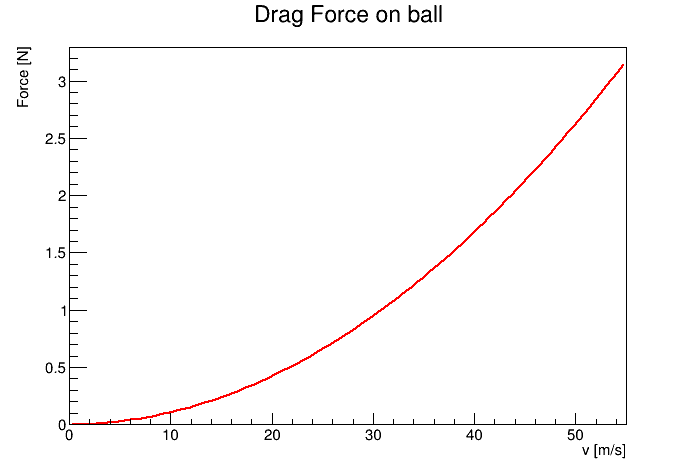

In [3]:
tc=r.TCanvas()
Fd.Draw()
tc.Draw()

MODEL 2
=======
Fitzpatrick book Section 3.12, equations 3.40--3.41

Drag acceleration $\frac{\vec F_{\text D}}{m}=-F(v)v\vec v$<br>
Force coefficient $F(v) =  0.0039 + \frac{0.0058}{1+{\text{exp}}[(v-v_d)/\Delta]}$,<br>
$v_d = 35~\text{m/s}, \Delta = 5~\text{m/s}$


In [4]:
# force coefficient, Fitzpatrick 3.41
Fv=r.TF1("Cd","(0.0039+0.0058/(1+exp((x-35)/5)))",0,55) # 0--55 m/s ~ 0--120 mph
Fv.SetTitle("Force Coefficient;v [m/s]; F(v) [kg/m]")

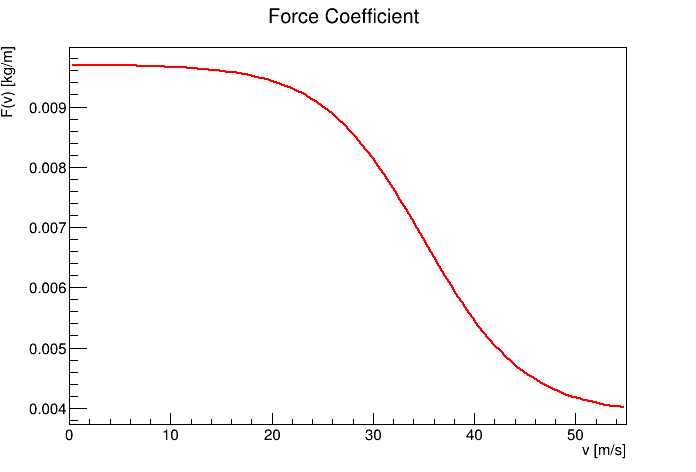

In [5]:
tc=r.TCanvas()
Fv.Draw()
tc.Draw()

In [6]:
# magnitude of force = m*v^2*Fv, Fitzpatrick 3.41 * mass
Fd=r.TF1("Fv","0.145*x*x*(0.0039+0.0058/(1+exp((x-35)/5)))",0,55) # 0--55 mph ~ 0--120 mph
Fd.SetTitle("Drag Force;v [m/s];Force [N]")

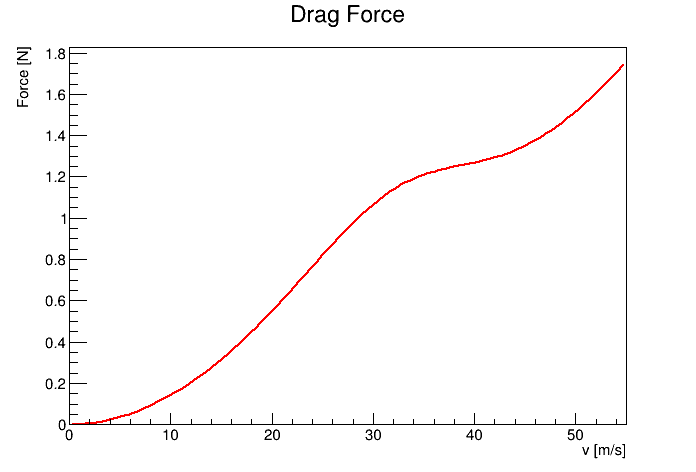

In [7]:
tc=r.TCanvas()
Fd.Draw()
tc.Draw()

Note: Be careful of vector components when doing your calculations!